# 【真题模拟】中文手动分词
## 中文分词
#### 介绍
中文分词是将连续的中文文本切割成词语的过程。由于中文没有像英文那样明确的词语边界，中文分词是中文自然语言处理的重要预处理步骤，对于后续的文本处理任务具有重要影响。常用的中文分词技术方案有，基于规则的分词、基于统计的分词、基于机器学习的分词。

#### 准备
words.txt 是本任务提供的词表，每一行为一个中文词汇。
task.py 是你后续答题过程中编写代码的地方。
#### 目标
本任务将针对中文文本实现一种正向最大匹配分词算法，它属于基于规则的分词方法，只需要具备一个中文词表即可。其基本步骤如下：

从待分词文本的开始位置选择一个最大词长（即词典中最长词的字符个数）的片段，如果文本不足最大词长，则选择整个文本。
针对选定的片段，首先判断该片段是否在词表中。
如果在，则将其作为一个词切分出来。
如果不在，则从片段的右边开始，减少一个字符，判断剩余片段是否在词表中。
如果在，则将其作为一个词切分出来；
如果不在，则继续减少一个字符进行判断，依次循环，直到只剩下一个字，并将单个字符视为一个词。
除去步骤 2 切分出来的词，针对剩余文本，重复步骤 2，直到处理完所有字符。
请在 task.py 文件中按要求实现以下目标。

#### 目标：实现 forward_segment 函数

+ 参数： 

text（字符串）：表示待分词的文本，如：'你真好'。
dictionary（set 集合）：包含词典中的所有词语。
max_len（整数）：表示词的最大长度，默认为 5。

+ 功能： 

实现正向最大匹配的中文分词算法，对输入文本进行分词，得到对应的分词序列。
返回值： 

+ segments（列表）：  

分词结果，如：['你', '真好']。

In [ ]:
def forward_segment(text, dictionary, max_len=5):
    #TODO

    pass


def main():
    dictionary = set()
    with open('words.txt', 'r', encoding='utf-8') as f:
        for line in f:
            word = line.strip()
            dictionary.add(word)

    text = "这个狗狗很漂亮！"
    seg_text = forward_segment(text, dictionary)
    print("分词后的文本:", seg_text)



In [ ]:
# 输出示例：

分词后的文本: ['这个', '狗狗', '很漂亮', '！']

+ 规定

务必在 #TODO 所在的函数范围内编写代码。
切勿修改任务中默认提供的文件名称、函数名称等。

+ 判分标准

满分为 7 分，判分细则如下：

实现目标，7 分；
注意： 未遵守规定，0 分。

#### 参考答案

In [ ]:
def forward_segment(text, dictionary, max_len=5):
    #TODO
    segments = []  # 存储分词结果的列表
    text_length = len(text)  # 待分词文本的长度
    i = 0  # 当前位置指针
    while i < text_length:
        matched = False  # 匹配标志
        # 从最大词长开始递减尝试匹配
        for j in range(i + max_len, i, -1):
            if j > text_length:
                continue  # 避免索引越界
            word = text[i:j]  # 截取长度为 j-i 的词
            if word in dictionary:  # 如果截取的词在词典中存在
                segments.append(word)  # 将词添加到分词结果列表中
                matched = True  # 设置匹配标志为 True
                i = j  # 更新下一个位置
                break
        # 如果没有匹配到词，则将当前字符视为单个字符的词
        if not matched:
            segments.append(text[i])
            i += 1
    return segments


def main():
    dictionary = set()
    with open('words.txt', 'r', encoding='utf-8') as f:
        for line in f:
            word = line.strip()
            dictionary.add(word)

    text = "这个狗狗很漂亮！"
    seg_text = forward_segment(text, dictionary)
    print("分词后的文本:", seg_text)

if __name__ == '__main__':
    main()

``` python
def forward_segment(text, dictionary, max_len=5):
    seg_text = []
    text_len = len(text)
    
    i = 0
    for i in range(text_len-1):
        match = False

        for j in range(i+max_len,i,-1):
            if j > text_len:
                continue
            if text[i:j] in dictionary and not match:
                match = True
                seg_text.append(text[i:j])
                print(i,j)
                i = j
                break

    return seg_text
def main():
    dictionary = set()
    with open('words.txt', 'r', encoding='utf-8') as f:
        for line in f:
            word = line.strip()
            dictionary.add(word) 
    
    text = "这个狗狗很漂亮！"
    seg_text = forward_segment(text, dictionary)
    print("分词后的文本:", seg_text)

if __name__ == "__main__":
    main()

```

******

```python
def forward_segment(text, dictionary, max_len=5):
    seg_text = []
    text_len = len(text)
    
    i = 0
    while i < text_len:
        match = False

        for j in range(i+max_len,i,-1):
            if j > text_len:
                continue
            if text[i:j] in dictionary and not match:
                match = True
                seg_text.append(text[i:j])
                print(i,j)
                i = j
                break
        
        if not match:
            i = i + 1
    return seg_text

def main():
    dictionary = set()
    with open('words.txt', 'r', encoding='utf-8') as f:
        for line in f:
            word = line.strip()
            dictionary.add(word) 
    
    text = "这个狗狗很漂亮！"
    seg_text = forward_segment(text, dictionary)
    print("分词后的文本:", seg_text)

if __name__ == "__main__":
    main()

```
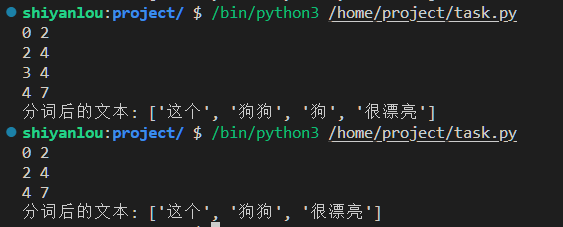

<mark>ERROR</mark>: 
* for range()  与 while 方法不一样
* 判断使用的是 and or / 不能用 &